In [68]:
import numpy as np
import matplotlib.pyplot as plt

## Função para resolver o problema
Implementação do método explícito com diferenças finitas progressivas no espaço e avançadas no tempo.


In [69]:
def resolver_adveccao(t_total, n, L, u, dt, T_A, T_inicial):
    # Calcula o espaçamento entre pontos
    dx = L / (n - 1)
    
    # Calcula quantos passos de tempo são necessários
    num_passos = int(t_total / dt)
    
    # Cria vetor de posições
    x = np.linspace(0, L, n)
    
    # Calcula número de Courant (para estabilidade)
    C = abs(u) * dt / dx
    
    # Checa se é estável
    if C > 1:
        print(f"Instável! C = {C:.4f}. Os resultados não são confiáveis.")
    
    # Cria vetor de temperatura inicial
    T = np.full(n, T_inicial)
    
    # Loop no tempo
    for _ in range(num_passos):
        T_novo = T.copy()
        
        # Atualiza temperatura nos pontos internos
        for i in range(1, n-1):
            T_novo[i] = T[i] - C * (T[i] - T[i-1])
        
        # Temperatura fixa na entrada (x=0)
        T_novo[0] = T_A
        
        # Temperatura na saída (x=L) igual ao ponto anterior
        T_novo[-1] = T_novo[-2]
        
        # Atualiza para próximo passo
        T = T_novo
    
    return T, x, C


## Parâmetros do Problema
Definição das constantes conforme o item 6 do PDF.

In [70]:
L = 1.0           # Comprimento da barra (m)
u = 0.1           # Velocidade de advecção (m/s)
n = 101           # Número de nós no espaço (dx = 1.0/100 = 0.01m)
dt = 0.05         # Passo no tempo (s)
t_total = 5.0     # Tempo total de simulação (s)
T_inicial = 20.0  # Condição Inicial: T(x,0) = 20 °C
T_A = 100.0       # Contorno em x=0: T(0,t) = 100 °C

## Execução e Verificação de Estabilidade
Executa a solução para o tempo final e verifica o número de Courant.

In [71]:
T_final, x, Courant = resolver_adveccao(t_total, n, L, u, dt, T_A, T_inicial)

print(f"Simulação concluída.")
print(f"Número de Courant (CFL): {Courant:.4f}")
if Courant <= 1:
    print("Condição de estabilidade satisfeita (C <= 1).")
else:
    print("ATENÇÃO: Solução instável!")

Simulação concluída.
Número de Courant (CFL): 0.5000
Condição de estabilidade satisfeita (C <= 1).


## Visualização Inicial

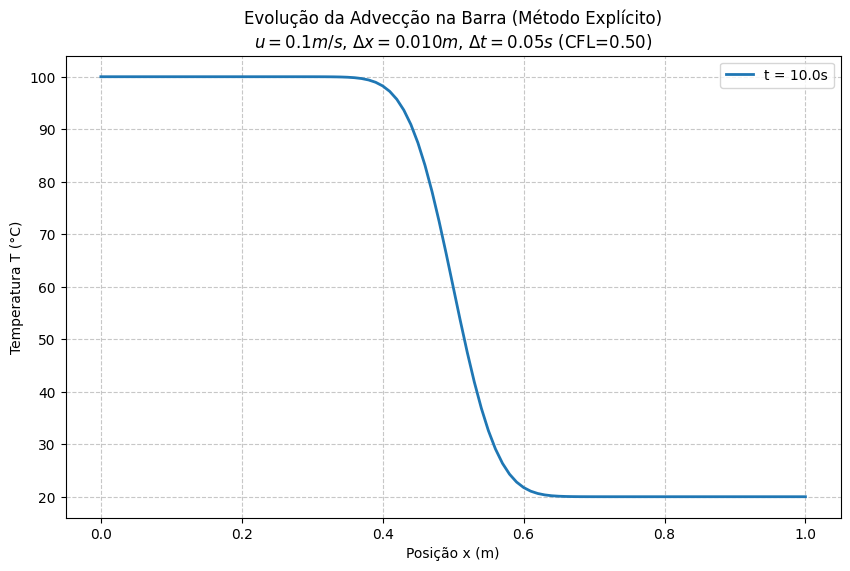

In [72]:
plt.figure(figsize=(10, 6))

    
plt.plot(x, T_final, label=f't = {t}s', linewidth=2, color='C0')

# Detalhes do Gráfico
plt.xlabel('Posição x (m)')
plt.ylabel('Temperatura T (°C)')
plt.title(f'Evolução da Advecção na Barra (Método Explícito)\n$u={u} m/s$, $\Delta x={L/(n-1):.3f} m$, $\Delta t={dt} s$ (CFL={Courant:.2f})')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.savefig('grafico_adveccao.png')
plt.show()

## Gráfico da Evolução Temporal
O gráfico abaixo mostra como a frente de temperatura ("degrau" de 100°C) avança pela barra ao longo do tempo. Como $u=0.1$ m/s e $t=5.0$ s, a frente deve ter percorrido aproximadamente $0.5$ m (metade da barra).


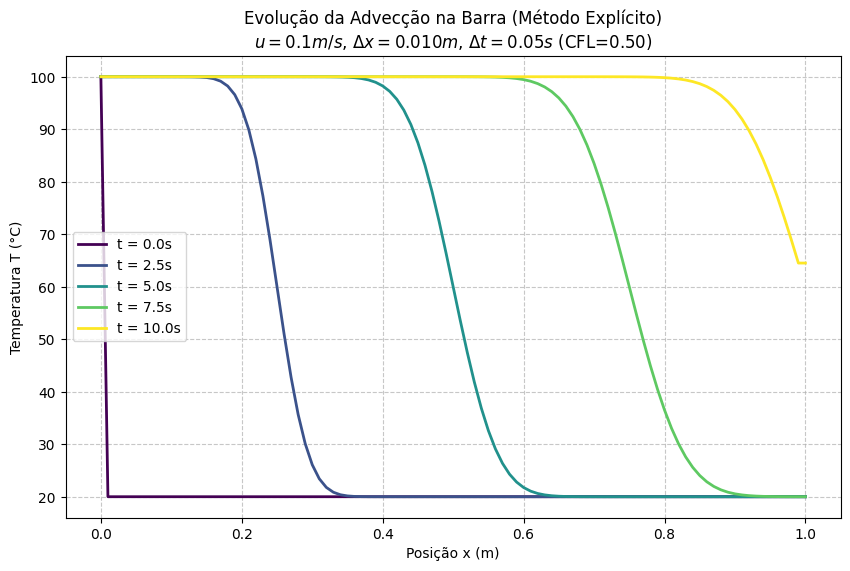

In [73]:
# Tempos para plotar
tempos_para_plotar = [0.0, 2.5, 5.0, 7.5, 10.0]

plt.figure(figsize=(10, 6))

# Define o colormap
cmap = plt.cm.viridis
colors = [cmap(i / (len(tempos_para_plotar) - 1)) for i in range(len(tempos_para_plotar))]

for idx, t in enumerate(tempos_para_plotar):
    if t == 0:
        # Condição inicial manual para plot
        T_plot = np.full(n, T_inicial)
        T_plot[0] = T_A # Ajuste visual do contorno
    else:
        T_plot, _, _ = resolver_adveccao(t, n, L, u, dt, T_A, T_inicial)
    
    plt.plot(x, T_plot, label=f't = {t}s', linewidth=2, color=colors[idx])

# Detalhes do Gráfico
plt.xlabel('Posição x (m)')
plt.ylabel('Temperatura T (°C)')
plt.title(f'Evolução da Advecção na Barra (Método Explícito)\n$u={u} m/s$, $\Delta x={L/(n-1):.3f} m$, $\Delta t={dt} s$ (CFL={Courant:.2f})')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.savefig('grafico_adveccao.png')
plt.show()

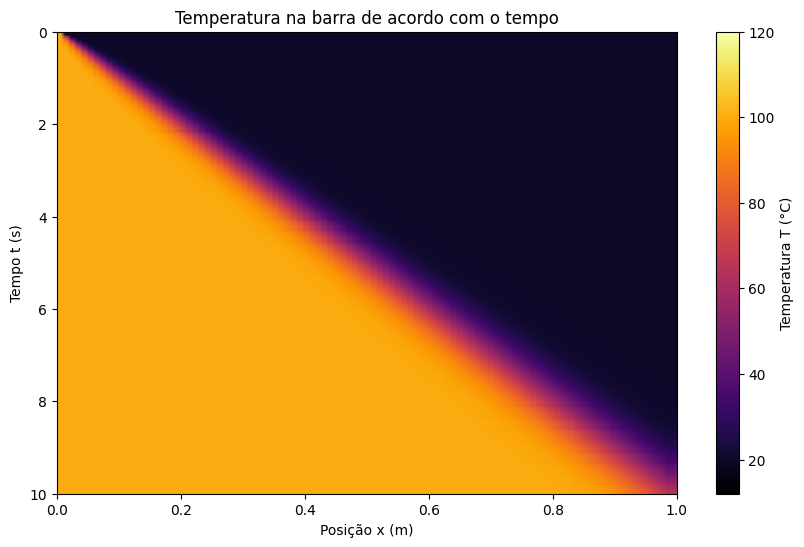

In [74]:
# Cria um heatmap da evolução temporal da temperatura
t_total = 10.0 
plt.figure(figsize=(10, 6))
T_evolucao = np.zeros((int(t_total/dt)+1, n))
for step in range(int(t_total/dt)+1):
    t = step * dt
    if t == 0:
        T_evolucao[step, :] = np.full(n, T_inicial)
        T_evolucao[step, 0] = T_A
    else:
        T_temp, _, _ = resolver_adveccao(t, n, L, u, dt, T_A, T_inicial)
        T_evolucao[step, :] = T_temp
plt.imshow(T_evolucao, extent=[0, L, t_total, 0], aspect='auto', cmap='inferno', vmin=12, vmax=120)
plt.colorbar(label='Temperatura T (°C)')
plt.xlabel('Posição x (m)')
plt.ylabel('Tempo t (s)')
plt.title('Temperatura na barra de acordo com o tempo')
plt.savefig('heatmap_adveccao.png')
plt.show()

Instável! C = 1.0000. Os resultados não são confiáveis.
Instável! C = 1.0000. Os resultados não são confiáveis.
Instável! C = 1.0000. Os resultados não são confiáveis.
Instável! C = 1.0000. Os resultados não são confiáveis.
Instável! C = 1.0000. Os resultados não são confiáveis.
Instável! C = 1.0000. Os resultados não são confiáveis.
Instável! C = 1.0000. Os resultados não são confiáveis.
Instável! C = 1.0000. Os resultados não são confiáveis.
Instável! C = 1.0000. Os resultados não são confiáveis.
Instável! C = 1.0000. Os resultados não são confiáveis.
Instável! C = 1.0000. Os resultados não são confiáveis.
Instável! C = 1.0000. Os resultados não são confiáveis.
Instável! C = 1.0000. Os resultados não são confiáveis.
Instável! C = 1.0000. Os resultados não são confiáveis.
Instável! C = 1.0000. Os resultados não são confiáveis.
Instável! C = 1.0000. Os resultados não são confiáveis.
Instável! C = 1.0000. Os resultados não são confiáveis.
Instável! C = 1.0000. Os resultados não são conf

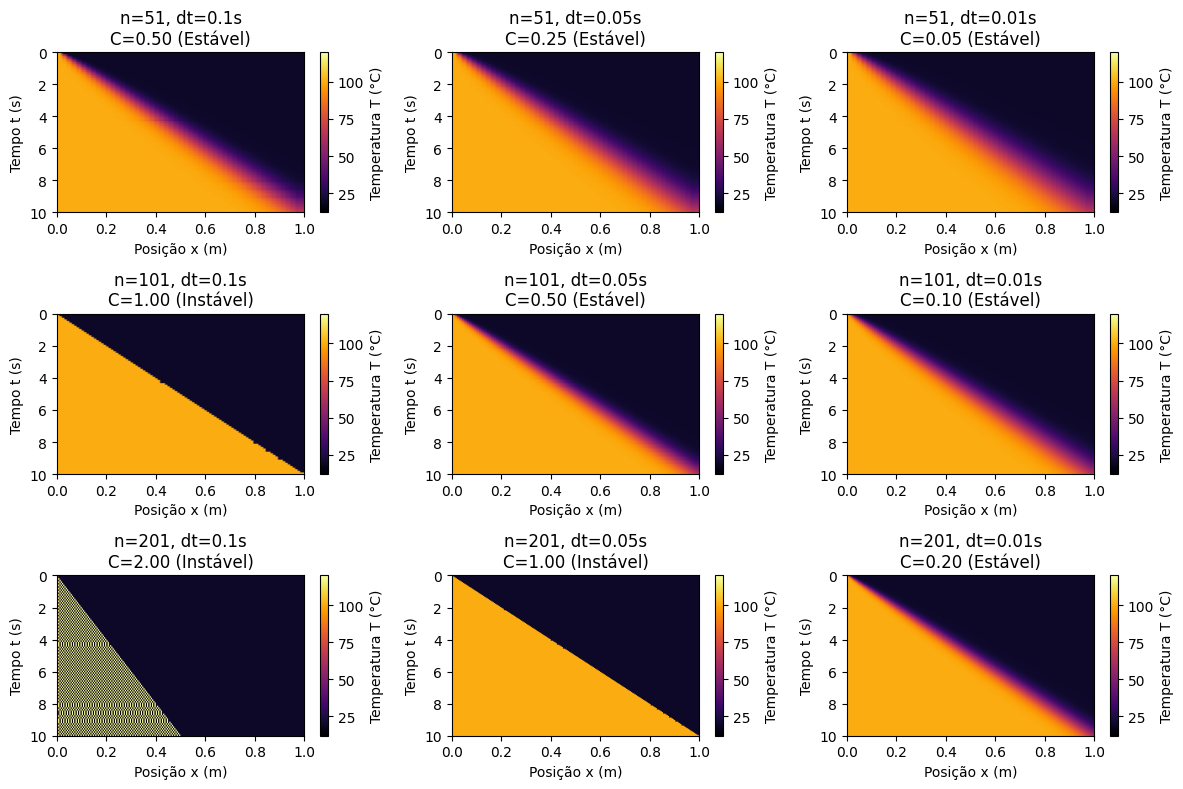

In [75]:
# plota heatmap de diferentes barras variando n e dt
# --- IGNORE ---
n_values = [51, 101, 201]
dt_values = [0.1, 0.05, 0.01]
# --- IGNORE ---
plt.figure(figsize=(12, 8))
for i, n in enumerate(n_values):
    for j, dt in enumerate(dt_values):
        T_evolucao = np.zeros((int(t_total/dt)+1, n))
        C_evolucao = np.zeros((int(t_total/dt)+1, n))
        for step in range(int(t_total/dt)+1):
            t = step * dt
            if t == 0:
                T_evolucao[step, :] = np.full(n, T_inicial)
                T_evolucao[step, 0] = T_A
            else:
                T_temp, _, c = resolver_adveccao(t, n, L, u, dt, T_A, T_inicial)
                T_evolucao[step, :] = T_temp
                C_evolucao[step, :] = c
        plt.subplot(len(n_values), len(dt_values), i*len(dt_values) + j + 1)
        plt.imshow(T_evolucao, extent=[0, L, t_total, 0], aspect='auto', cmap='inferno', vmin=12, vmax=120)
        plt.colorbar(label='Temperatura T (°C)')
        plt.xlabel('Posição x (m)')
        plt.ylabel('Tempo t (s)')
        c_calc = np.max(C_evolucao) 
        
        if c_calc <= 1:
            stability = "Estável"
        else:
            stability = "Instável"
        plt.title(f'n={n}, dt={dt}s\nC={c_calc:.2f} ({stability})')
plt.tight_layout()
plt.savefig('heatmap_varios_adveccao.png')
plt.show()

Instável! C = 2.0000. Os resultados não são confiáveis.
Instável! C = 2.0000. Os resultados não são confiáveis.
Instável! C = 2.0000. Os resultados não são confiáveis.
Instável! C = 2.0000. Os resultados não são confiáveis.
Instável! C = 2.0000. Os resultados não são confiáveis.
Instável! C = 2.0000. Os resultados não são confiáveis.
Instável! C = 2.0000. Os resultados não são confiáveis.
Instável! C = 2.0000. Os resultados não são confiáveis.
Instável! C = 2.0000. Os resultados não são confiáveis.
Instável! C = 2.0000. Os resultados não são confiáveis.
Instável! C = 2.0000. Os resultados não são confiáveis.
Instável! C = 2.0000. Os resultados não são confiáveis.
Instável! C = 2.0000. Os resultados não são confiáveis.
Instável! C = 2.0000. Os resultados não são confiáveis.
Instável! C = 2.0000. Os resultados não são confiáveis.
Instável! C = 2.0000. Os resultados não são confiáveis.
Instável! C = 2.0000. Os resultados não são confiáveis.
Instável! C = 2.0000. Os resultados não são conf

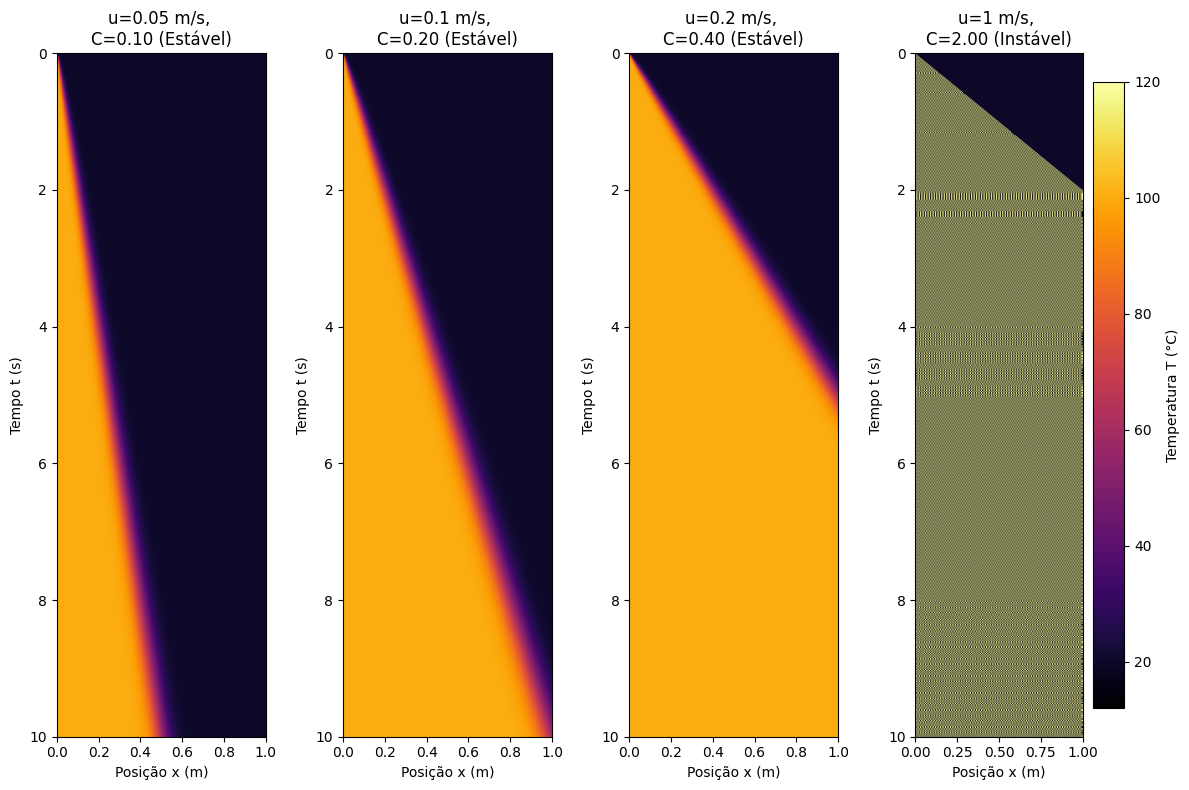

In [78]:
# plota heatmap para diferentes barras variando u 
# --- IGNORE ---
u_values = [0.05, 0.1, 0.2, 1]
# --- IGNORE ---
plt.figure(figsize=(12, 8))
for i, u in enumerate(u_values):
    T_evolucao = np.zeros((int(t_total/dt)+1, n))
    for step in range(int(t_total/dt)+1):
        t = step * dt
        if t == 0:
            T_evolucao[step, :] = np.full(n, T_inicial)
            T_evolucao[step, 0] = T_A
        else:
            T_temp, _, c = resolver_adveccao(t, n, L, u, dt, T_A, T_inicial)
            T_evolucao[step, :] = T_temp
            C_evolucao[step, :] = c
    plt.subplot(1, len(u_values), i + 1)
    plt.imshow(T_evolucao, extent=[0, L, t_total, 0], aspect='auto', cmap='inferno', vmin=12, vmax=120)
    plt.xlabel('Posição x (m)')
    plt.ylabel('Tempo t (s)')
    c_calc = np.max(C_evolucao) 
        
    if c_calc <= 1:
        stability = "Estável"
    else:
        stability = "Instável"
    plt.title(f'u={u} m/s, \nC={c_calc:.2f} ({stability})')
plt.colorbar(label='Temperatura T (°C)')
plt.tight_layout()
plt.savefig('heatmap_varios_u_adveccao.png')
plt.show()